In [2]:
import pyodbc
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
conn = pyodbc.connect('Driver={SQL Server};''Server=sqlcovid19.database.windows.net;''Database=DB_COVID_NINETEEN;''UID=datarangers;''PWD=data_rangers19')

In [5]:
query_covid = 'SELECT * FROM COUNTRY_COVID_DAILY_CASES'
query_country = 'SELECT * FROM COUNTRY'

In [6]:
df_data = pd.read_sql(query_covid,conn)
df_country = pd.read_sql(query_country,conn)

In [8]:
with conn:
    crs = conn.cursor()
    crs.close()

In [9]:
df_geral = pd.merge(df_data, df_country, left_on='ID_COUNTRY', right_on='ID')
df_geral.drop(['ID_x', 'ID_y', 'ISO2', 'SLUG'], axis = 1) 
df_geral = df_geral[['DATE','ID_COUNTRY', 'NAME', 'ID_CASE_TYPE', 'TOTAL_CASES']]
df_geral.head()

,DATE,ID_COUNTRY,NAME,ID_CASE_TYPE,TOTAL_CASES
0,2020-01-22,1,Albania,1,0
1,2020-01-22,1,Albania,2,0
2,2020-02-01,1,Albania,1,0
3,2020-02-01,1,Albania,2,0
4,2020-02-11,1,Albania,1,0


In [10]:
df_geral['DATE'] = pd.to_datetime(df_geral['DATE'], infer_datetime_format=True)
df_geral.set_index('DATE', inplace=True)
df_geral

,ID_COUNTRY,NAME,ID_CASE_TYPE,TOTAL_CASES
DATE,,,,
2020-01-22,1,Albania,1,0
2020-01-22,1,Albania,2,0
2020-02-01,1,Albania,1,0
2020-02-01,1,Albania,2,0
2020-02-11,1,Albania,1,0
...,...,...,...,...
2021-02-11,333,United States of America,2,480365
2021-02-22,333,United States of America,1,28229362
2021-02-22,333,United States of America,2,500930


In [11]:
df_geral.sort_index(ascending=False, inplace=True)
df_geral

,ID_COUNTRY,NAME,ID_CASE_TYPE,TOTAL_CASES
DATE,,,,
2021-03-12,287,"Micronesia, Federated States of",2,0
2021-03-12,257,Brunei Darussalam,2,3
2021-03-12,251,"Iran, Islamic Republic of",1,1723470
2021-03-12,251,"Iran, Islamic Republic of",2,61016
2021-03-12,294,Bolivia,2,11903
...,...,...,...,...
2020-01-22,139,Estonia,2,0
2020-01-22,139,Estonia,1,0
2020-01-22,138,Colombia,2,0


In [40]:
df_geral = df_geral.sort_values(by='TOTAL_CASES', ascending=False)
df_geral

,ID_COUNTRY,NAME,ID_CASE_TYPE,TOTAL_CASES
DATE,,,,
2021-03-01,333,United States of America,1,28705285
2021-02-22,333,United States of America,1,28229362
2021-02-11,333,United States of America,1,27456653
2021-02-01,333,United States of America,1,26380978
2021-01-22,333,United States of America,1,24901279
...,...,...,...,...
2020-04-01,54,Madagascar,2,0
2020-04-01,195,Sierra Leone,2,0
2020-04-01,155,Zambia,2,0


Dataframes auxiliares para questões 1 e 2

In [41]:
df_casos = df_geral.loc[df_geral['ID_CASE_TYPE'] == 1, :].sort_values(by='TOTAL_CASES', ascending=False)
df_mortes = df_geral.loc[df_geral['ID_CASE_TYPE'] == 2, :].sort_values(by='TOTAL_CASES', ascending=False)

In [49]:
#Lista com datas no bd
datas_bd = sorted(list(set(df_casos.index)), reverse=True)
print(datas_bd)

[Timestamp('2021-03-12 00:00:00'), Timestamp('2021-03-11 00:00:00'), Timestamp('2021-03-10 00:00:00'), Timestamp('2021-03-01 00:00:00'), Timestamp('2021-02-22 00:00:00'), Timestamp('2021-02-11 00:00:00'), Timestamp('2021-02-01 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-15 00:00:00'), Timestamp('2021-01-11 00:00:00'), Timestamp('2021-01-07 00:00:00'), Timestamp('2021-01-01 00:00:00'), Timestamp('2020-12-22 00:00:00'), Timestamp('2020-12-15 00:00:00'), Timestamp('2020-12-11 00:00:00'), Timestamp('2020-12-01 00:00:00'), Timestamp('2020-11-22 00:00:00'), Timestamp('2020-11-11 00:00:00'), Timestamp('2020-11-01 00:00:00'), Timestamp('2020-10-22 00:00:00'), Timestamp('2020-10-11 00:00:00'), Timestamp('2020-10-01 00:00:00'), Timestamp('2020-09-22 00:00:00'), Timestamp('2020-09-11 00:00:00'), Timestamp('2020-09-01 00:00:00'), Timestamp('2020-08-22 00:00:00'), Timestamp('2020-08-11 00:00:00'), Timestamp('2020-08-01 00:00:00'), Timestamp('2020-07-22 00:00:00'), Timestamp('20

In [46]:
top_casos = df_casos['NAME'].unique()[:10]
top_mortes = df_mortes['NAME'].unique()[:10]

# 1) Panorama diário de quantidade de casos confirmados de COVID-19 dos 10 países do mundo com maiores números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

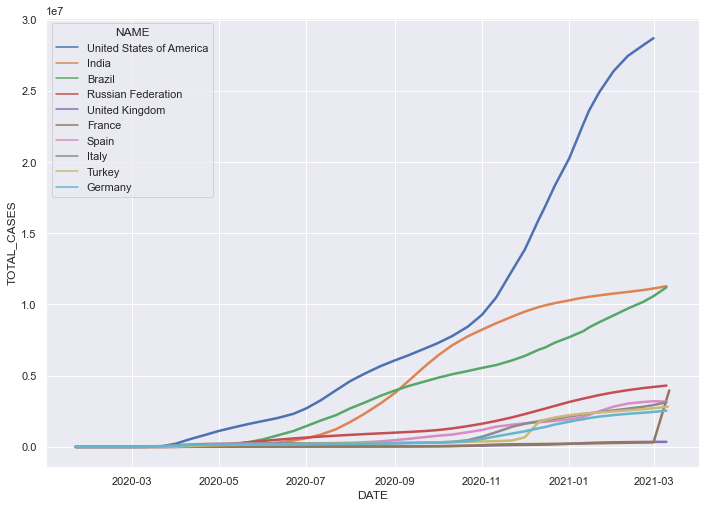

In [47]:
df_q1 = df_casos.loc[df_casos['NAME'].isin(top_casos), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q1)

# 2) Panorama diário de quantidade de mortes de COVID-19 dos 10 países do mundo com números.

<AxesSubplot:xlabel='DATE', ylabel='TOTAL_CASES'>

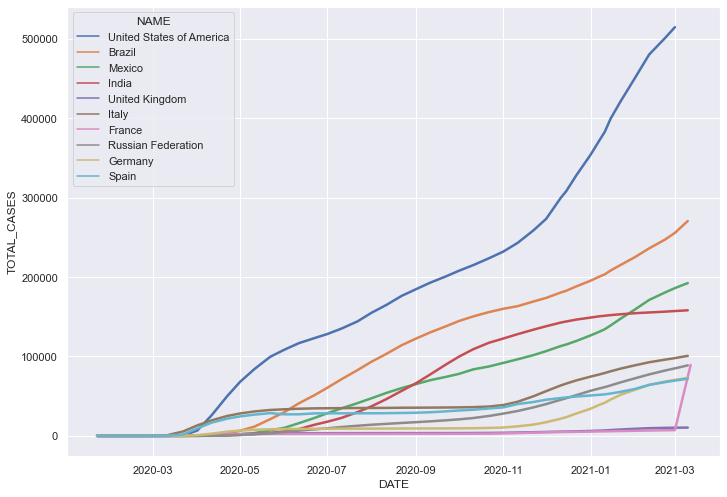

In [48]:
df_q2 = df_mortes.loc[df_mortes['NAME'].isin(top_mortes), :]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="DATE", y="TOTAL_CASES", hue="NAME", ci=None, linewidth = 2.5, data=df_q2)

# 3) Total de mortes por COVID-19 dos 10 países do mundo com maiores números.

In [62]:
df_mortes.loc[(df_mortes['NAME'].isin(top_mortes)), ['NAME', 'TOTAL_CASES']].drop_duplicates(subset=['NAME']).head(10)

,NAME,TOTAL_CASES
DATE,,
2021-03-01,United States of America,514810
2021-03-10,Brazil,270656
2021-03-10,Mexico,192491
2021-03-10,India,158189
2021-03-10,United Kingdom,124987
2021-03-10,Italy,100811
2021-03-12,France,89328
2021-03-10,Russian Federation,88773
2021-03-10,Germany,72858


# 4) Total de casos confirmados por COVID-19 dos 10 países do mundo com maiores números.

In [63]:
df_casos.loc[(df_casos['NAME'].isin(top_casos)), ['NAME', 'TOTAL_CASES']].drop_duplicates(subset=['NAME']).head(10)

,NAME,TOTAL_CASES
DATE,,
2021-03-01,United States of America,28705285
2021-03-10,India,11285561
2021-03-10,Brazil,11202305
2021-03-10,Russian Federation,4302726
2021-03-10,United Kingdom,4234924
2021-03-12,France,3963156
2021-03-01,Spain,3204531
2021-03-10,Italy,3123368
2021-03-11,Turkey,2821943
